In [27]:
import pandas as pd
import pandas as pd
import numpy as  np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
import seaborn as sns

# 读取 .xlsm 文件
file_path = 'unemployment.xlsm'
df = pd.read_excel(file_path, engine='openpyxl')

# 将数据保存为 .csv 文件
output_csv_path = 'unemployment.csv'
df.to_csv(output_csv_path, index=False)

# 查看数据前几行
print(df.head())

           Country Name       1991       1992       1993       1994  \
0           Afghanistan  30.900000  30.900000  31.200001  30.700001   
1                Angola  11.700000  12.200000  13.700000  11.700000   
2               Albania  24.200001  29.400000  34.000000  33.900002   
3            Arab World  42.271364  42.773196  45.371306  44.551975   
4  United Arab Emirates  15.900000  15.000000  17.900000   7.800000   

        1995       1996       1997       1998       1999  ...       2005  \
0  30.799999  30.600000  30.799999  30.900000  30.600000  ...  24.799999   
1  10.700000  10.300000  11.300000  11.800000  11.500000  ...  10.400000   
2  33.799999  30.700001  29.600000  31.000000  30.799999  ...  17.100000   
3  46.614946  45.494663  43.361790  44.285862  38.307636  ...  44.982840   
4   5.600000  11.300000  10.900000  17.100000  18.299999  ...  12.700000   

        2006       2007       2008      2009       2010       2011       2012  \
0  26.200001  24.500000  26.600000 

In [28]:
# 检查数据的基本信息
print(df.info())

# 处理缺失值
df.fillna(0, inplace=True)  # 或者使用其他方法处理缺失值

# 将第一列设置为索引
df.set_index(df.columns[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  219 non-null    object 
 1   1991          219 non-null    float64
 2   1992          219 non-null    float64
 3   1993          219 non-null    float64
 4   1994          219 non-null    float64
 5   1995          219 non-null    float64
 6   1996          219 non-null    float64
 7   1997          219 non-null    float64
 8   1998          219 non-null    float64
 9   1999          219 non-null    float64
 10  2000          219 non-null    float64
 11  2001          219 non-null    float64
 12  2002          219 non-null    float64
 13  2003          219 non-null    float64
 14  2004          219 non-null    float64
 15  2005          219 non-null    float64
 16  2006          219 non-null    float64
 17  2007          219 non-null    float64
 18  2008          219 non-null    

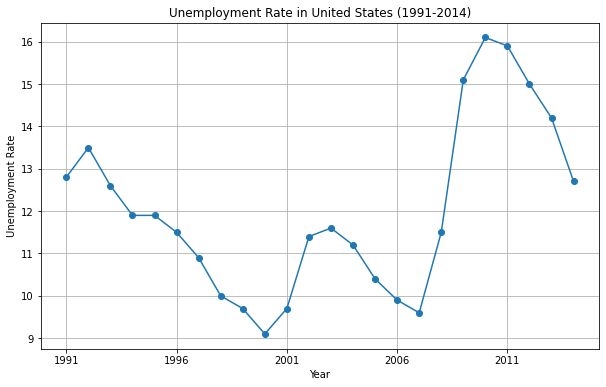

In [29]:
# 选择特定国家
country = 'United States'
country_data = df.loc[country]

# 绘制特定国家的失业率变化
plt.figure(figsize=(10, 6))
country_data.plot(kind='line', marker='o')
plt.title(f'Unemployment Rate in {country} (1991-2014)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

Predicted Unemployment Rate for United States in 2015: 11.14301024315765


/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/var/folders/84/p9_sbp291z5dk4f8nm4ybqz00000gn/T/ipykernel_68058/93316033.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Predicte

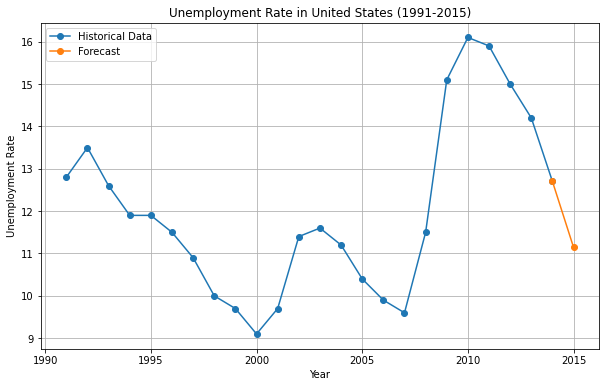

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# 选择特定国家
country = 'United States'
country_data = df.loc[country]

# 拟合 ARIMA 模型
model = ARIMA(country_data, order=(1, 1, 1))
model_fit = model.fit()

# 预测下一年
forecast = model_fit.forecast(steps=1)
print(f'Predicted Unemployment Rate for {country} in 2015: {forecast[0]}')

# 绘制历史数据和预测值
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data.values, label='Historical Data', marker='o')
plt.plot([2014, 2015], [country_data.values[-1], forecast[0]], label='Forecast', marker='o')
plt.title(f'Unemployment Rate in {country} (1991-2015)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

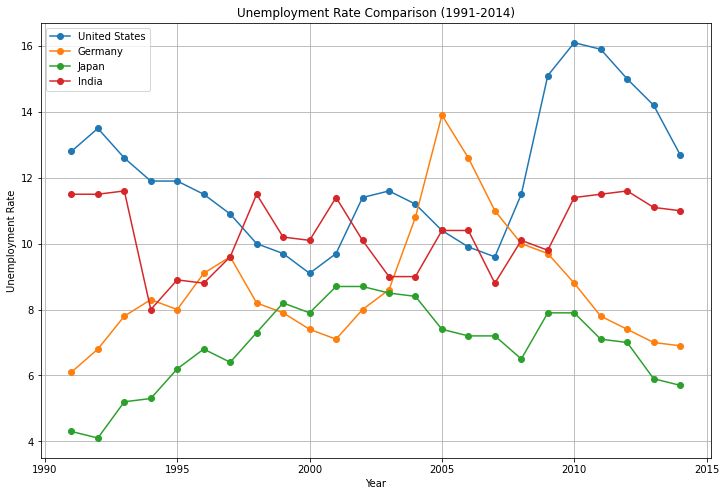

In [9]:
# 选择几个国家进行比较
countries = ['United States', 'Germany', 'Japan', 'India']
selected_data = df.loc[countries]

# 绘制不同国家的失业率变化
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(selected_data.columns, selected_data.loc[country], label=country, marker='o')

plt.title('Unemployment Rate Comparison (1991-2014)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

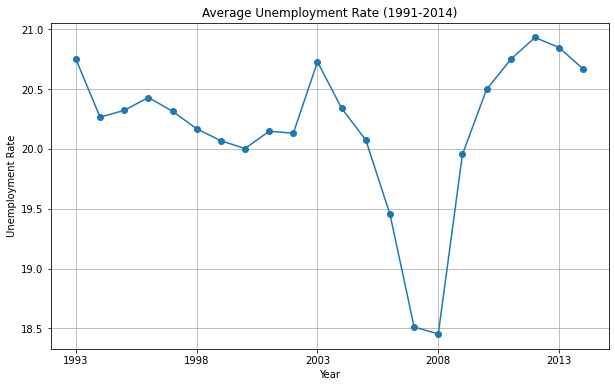

In [13]:
# 去除第一列（国家名字）
df = df.iloc[:, 1:]

# 去除第一行（年份图例）
df = df.iloc[1:, :]

# 将第一列设置为索引
df.set_index(df.columns[0], inplace=True)

# 将所有列转换为数值型数据
df = df.apply(pd.to_numeric, errors='coerce')

# 处理缺失值
df.fillna(0, inplace=True)  # 或者使用其他方法处理缺失值
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每年的平均失业率
average_unemployment = df.mean(axis=0)

# 绘制每年的平均失业率
plt.figure(figsize=(10, 6))
average_unemployment.plot(kind='line', marker='o')
plt.title('Average Unemployment Rate (1991-2014)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

KeyError: 'United States'